In [ ]:
#import libraries
import pandas as pd
import numpy as np
import missingno as ms

In [ ]:
#load dataset
data=pd.read_csv("https://raw.githubusercontent.com/Shreya-P7/set/main/AcademicPerformance.csv")
data.head()

,Gender,Groups,Education Level,Fee Structure,Test Preparation Course,WT Score,DSBDA Score,AI Score
0,Female,Group B,Bachelor's Degree,Standard,None,72.0,72.0,74
1,Female,Group C,Some College,Standard,Completed,69.0,90.0,88
2,Female,Group B,Master's Degree,Standard,None,90.0,95.0,93
3,Male,Group A,Associate's Degree,Free/Reduced,None,47.0,57.0,44
4,Male,Group C,Some College,Standard,None,76.0,78.0,75


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   1000 non-null   object 
 1   Groups                   1000 non-null   object 
 2   Education Level          997 non-null    object 
 3   Fee Structure            1000 non-null   object 
 4   Test Preparation Course  1000 non-null   object 
 5   WT Score                 999 non-null    float64
 6   DSBDA Score              998 non-null    float64
 7   AI Score                 1000 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 62.6+ KB


In [ ]:
data.describe(include='all')

,Gender,Groups,Education Level,Fee Structure,Test Preparation Course,WT Score,DSBDA Score,AI Score
count,1000,1000,997,1000,1000,999.000000,998.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,Female,Group C,Some College,Standard,None,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.093093,69.178357,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.170122,14.611940,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.000000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.000000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.000000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.000000,79.000000,79.000000


Handling Missing Values

<AxesSubplot:>

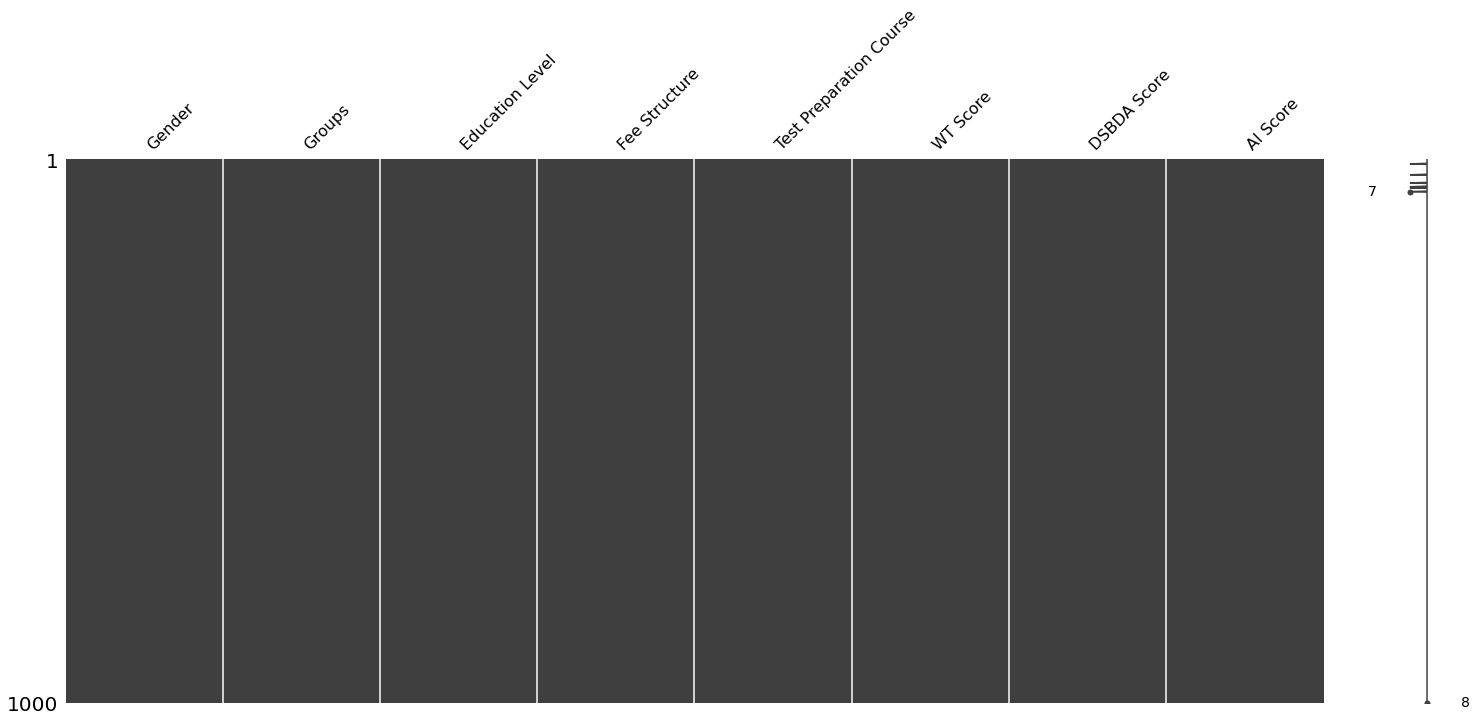

In [ ]:
ms.matrix(data)

In [ ]:
data.isnull().sum()

Gender                     0
Groups                     0
Education Level            3
Fee Structure              0
Test Preparation Course    0
WT Score                   1
DSBDA Score                2
AI Score                   0
dtype: int64

In [ ]:
data['WT Score']=data['WT Score'].fillna(data['WT Score'].mean())
data['DSBDA Score']=data['DSBDA Score'].fillna(data['DSBDA Score'].mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   1000 non-null   object 
 1   Groups                   1000 non-null   object 
 2   Education Level          997 non-null    object 
 3   Fee Structure            1000 non-null   object 
 4   Test Preparation Course  1000 non-null   object 
 5   WT Score                 1000 non-null   float64
 6   DSBDA Score              1000 non-null   float64
 7   AI Score                 1000 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 62.6+ KB


In [ ]:
data.Groups.value_counts()

Group C    319
Group D    262
Group B    190
Group E    140
Group A     89
Name: Groups, dtype: int64

Data Visualization

<AxesSubplot:xlabel='count', ylabel='Groups'>

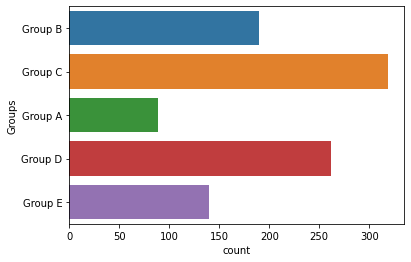

In [ ]:
import seaborn as sns
sns.countplot(data = data, y = 'Groups')

<AxesSubplot:xlabel='count', ylabel='Education Level'>

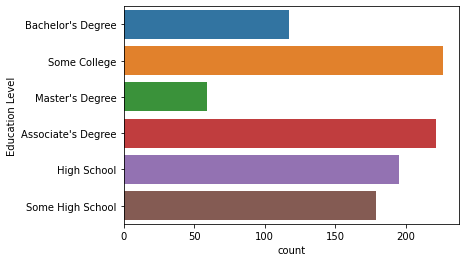

In [ ]:
sns.countplot(data = data, y = 'Education Level')

<AxesSubplot:xlabel='count', ylabel='Gender'>

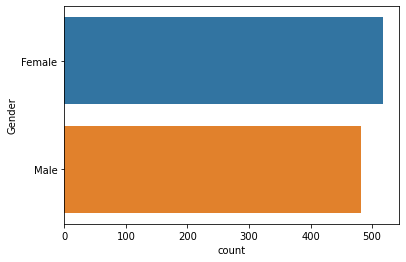

In [ ]:
sns.countplot(data = data, y = 'Gender')

Correlation Matrix

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'SUBJECTS CORRELATION MATRIX')

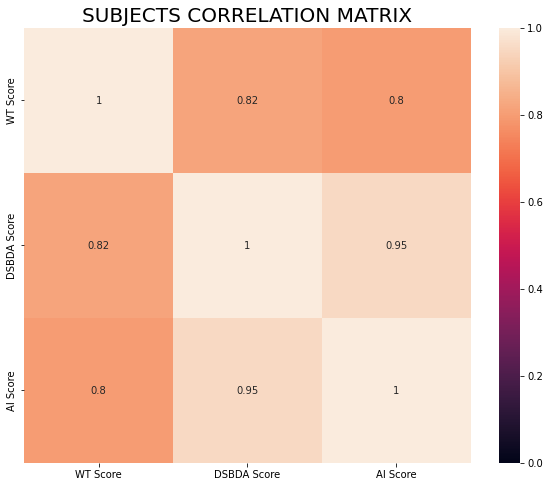

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr().round(2),annot=True, vmin = 0)
plt.title('SUBJECTS CORRELATION MATRIX' , size =20)


Detecting Outliers using Boxplot

[Text(0.5, 1.0, 'WT Scores')]

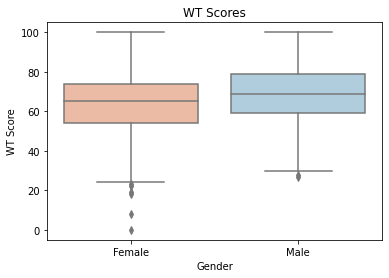

In [ ]:
sns.boxplot(data = data, y = 'WT Score', x = 'Gender', palette = 'RdBu').set(title = 'WT Scores')

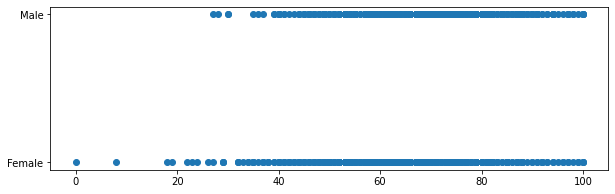

In [ ]:
fig, ax =plt.subplots(figsize=(10,3))
ax.scatter(data['WT Score'], data['Gender'])
plt.show()

[Text(0.5, 1.0, 'AI Scores')]

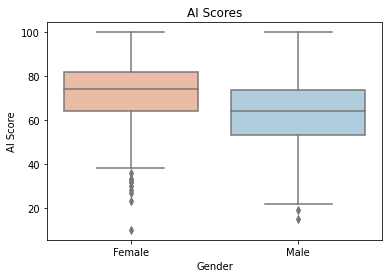

In [ ]:
sns.boxplot(data = data, y = 'AI Score', x = 'Gender', palette = 'RdBu').set(title = 'AI Scores')

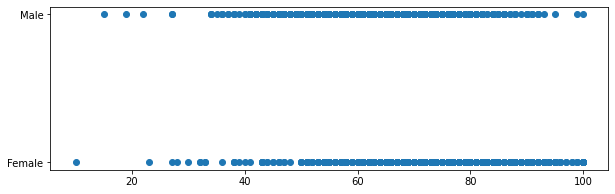

In [ ]:
fig, ax =plt.subplots(figsize=(10,3))
ax.scatter(data['AI Score'], data['Gender'])
plt.show()

[Text(0.5, 1.0, 'DSBDA Scores')]

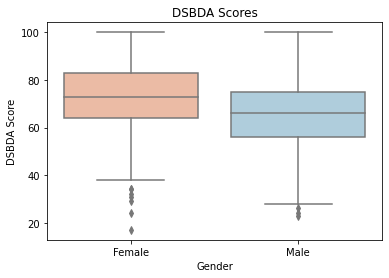

In [ ]:
sns.boxplot(data = data, y = 'DSBDA Score', x = 'Gender', palette = 'RdBu').set(title = 'DSBDA Scores')

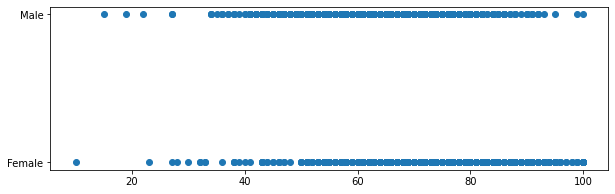

In [ ]:
fig, ax =plt.subplots(figsize=(10,3))
ax.scatter(data['AI Score'], data['Gender'])
plt.show()

<AxesSubplot:>

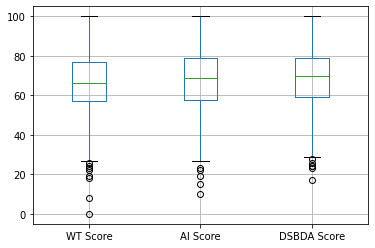

In [ ]:
col = ['WT Score','AI Score','DSBDA Score']
data.boxplot(col)

Z Score

In [ ]:
import numpy as np 
from scipy import stats
z=np.abs(stats.zscore(data['WT Score']))
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(z)

0      0.389768
1      0.191812
2      1.577499
3      1.259859
4      0.653708
5      0.323783
6      1.445529
7      1.721754
8      0.138113
9      1.853725
10     0.534023
11     1.721754
12     0.072128
13     0.785678
14     1.061904
15     0.191812
16     1.445529
17     3.173426
18     1.325844
19     0.797964
20     0.006143
21     0.072128
22     1.457814
23     0.191812
24     0.521738
25     0.455753
26     0.191812
27     0.059842
28     0.257798
29     0.000000
30     0.191812
31     0.204098
32     0.665993
33     1.721754
34     2.039394
35     0.983633
36     0.521738
37     1.061904
38     0.587723
39     0.600008
40     0.731978
41     0.534023
42     0.863949
43     0.468038
44     1.061904
45     0.072128
46     0.731978
47     0.006143
48     0.600008
49     1.049618
50     0.863949
51     0.719693
52     0.863949
53     1.445529
54     0.323783
55     2.183650
56     1.049618
57     0.929934
58     0.534023
59     4.361157
60     0.851663
61     1.787740
62     0

In [ ]:
threshold=0.9
sample_outliers = np.where(z <threshold)
sample_outliers

(array([  0,   1,   4,   5,   8,  10,  12,  13,  15,  19,  20,  21,  23,
         24,  25,  26,  27,  28,  29,  30,  31,  32,  36,  38,  39,  40,
         41,  42,  43,  45,  46,  47,  48,  50,  51,  52,  54,  58,  60,
         62,  63,  64,  65,  67,  68,  70,  71,  73,  78,  79,  83,  85,
         86,  87,  88,  89,  90,  92,  94,  95,  96,  97,  98,  99, 100,
        101, 103, 105, 107, 109, 110, 111, 112, 116, 117, 119, 120, 123,
        126, 127, 131, 133, 134, 135, 137, 138, 139, 140, 141, 143, 147,
        148, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 161, 166,
        167, 168, 169, 170, 172, 173, 177, 180, 183, 185, 187, 189, 190,
        191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 202, 203, 204,
        205, 208, 209, 213, 218, 219, 220, 222, 226, 227, 228, 230, 232,
        236, 237, 238, 240, 242, 243, 244, 247, 248, 249, 251, 252, 254,
        255, 256, 257, 258, 259, 260, 261, 264, 265, 266, 267, 269, 270,
        271, 273, 277, 278, 279, 280, 282, 283, 287

Inter Quartile Range

In [ ]:
def cal_iqr(df , column):

    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off

    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
 
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

cal_iqr(data,'WT Score')

The IQR is 20.0
The lower bound value is 27.0
The upper bound value is 107.0
Total number of outliers are 8


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


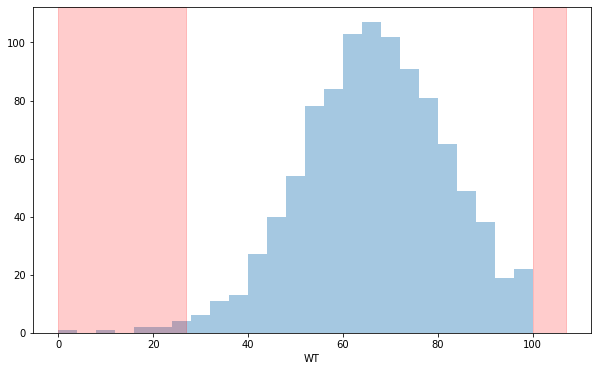

In [ ]:
df1 = data.rename(columns={'WT Score': 'WT', 'AI Score': 'AI', 'DSBDA Score': 'DSBDA'})
plt.figure(figsize = (10,6))
sns.distplot(df1.WT, kde=False)
plt.axvspan(xmin = lower,xmax= df1.WT.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df1.WT.max(),alpha=0.2, color='red')

In [ ]:
cal_iqr(data,'AI Score')

The IQR is 21.25
The lower bound value is 25.875
The upper bound value is 110.875
Total number of outliers are 5


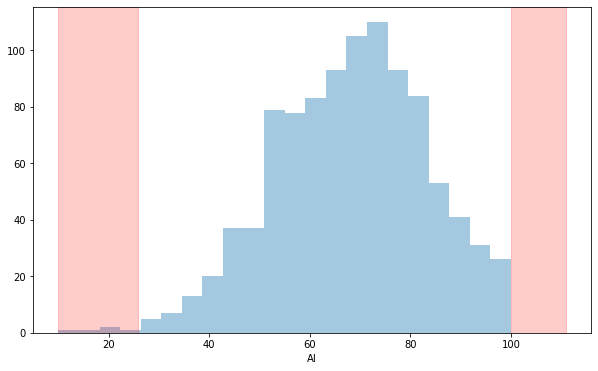

In [ ]:
plt.figure(figsize = (10,6))
sns.distplot(df1.AI, kde=False)
plt.axvspan(xmin = lower,xmax= df1.AI.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df1.AI.max(),alpha=0.2, color='red')

In [ ]:
cal_iqr(data,'DSBDA Score')

The IQR is 20.0
The lower bound value is 29.0
The upper bound value is 109.0
Total number of outliers are 6


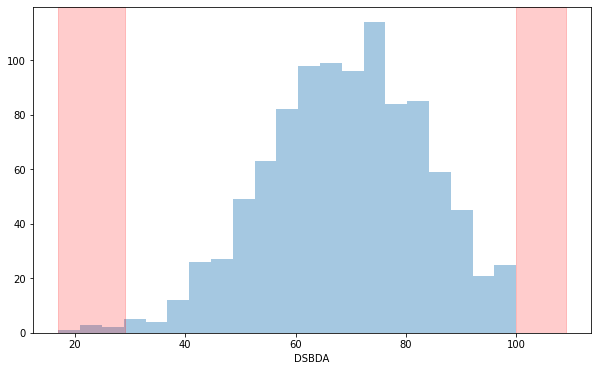

In [ ]:
plt.figure(figsize = (10,6))
sns.distplot(df1.DSBDA, kde=False)
plt.axvspan(xmin = lower,xmax= df1.DSBDA.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df1.DSBDA.max(),alpha=0.2, color='red')

Removing Outliers in WT Score

In [ ]:
median=np.median(data['WT Score'])
median

66.0

In [ ]:
new_data=data
new_data['WT Score'] = np.where(new_data['WT Score'] >upper, median,new_data['WT Score'])
new_data['WT Score'] = np.where(new_data['WT Score'] <lower, median,new_data['WT Score'])

In [ ]:
new_data

,Gender,Groups,Education Level,Fee Structure,Test Preparation Course,WT Score,DSBDA Score,AI Score
0,Female,Group B,Bachelor's Degree,Standard,None,72.0,72.0,74
1,Female,Group C,Some College,Standard,Completed,69.0,90.0,88
2,Female,Group B,Master's Degree,Standard,None,90.0,95.0,93
3,Male,Group A,Associate's Degree,Free/Reduced,None,47.0,57.0,44
4,Male,Group C,Some College,Standard,None,76.0,78.0,75
...,...,...,...,...,...,...,...,...
995,Female,Group E,Master's Degree,Standard,Completed,88.0,99.0,95
996,Male,Group C,High School,Free/Reduced,None,62.0,55.0,55
997,Female,Group C,High School,Free/Reduced,Completed,59.0,71.0,65
998,Female,Group D,Some College,Standard,Completed,68.0,78.0,77


In [ ]:
df1 = new_data.rename(columns={'WT Score': 'WT', 'AI Score': 'AI', 'DSBDA Score': 'DSBDA'})

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


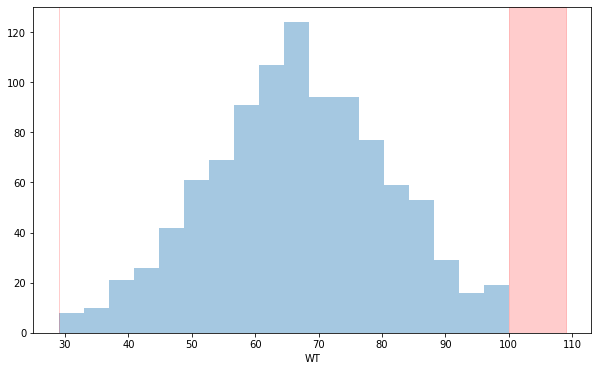

In [ ]:
plt.figure(figsize = (10,6))
sns.distplot(df1.WT, kde=False)
plt.axvspan(xmin = lower,xmax= df1.WT.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df1.WT.max(),alpha=0.2, color='red')

<AxesSubplot:>

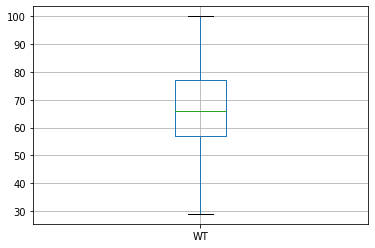

In [ ]:
df1.boxplot('WT')